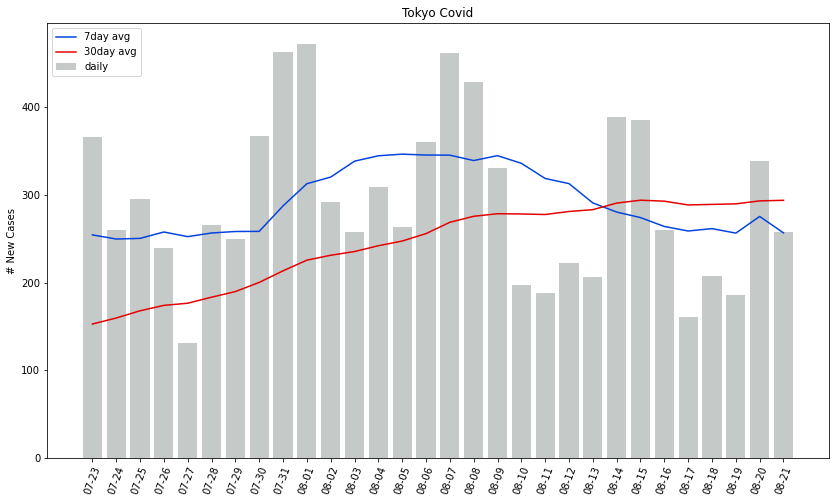

In [11]:
# welcome to twitter integration

import tweepy
import os
import pandas as pd
import matplotlib.pyplot as plt


# api key TV4nWBzyrUKNwMNfflZ2o5QZb
# api secret  N6ZecOdEvcTIZaSmKjA3dTmi6r9B1PHED57uXLdEIjQK7zar8N
# bearer  AAAAAAAAAAAAAAAAAAAAANIuJgEAAAAAWDG4f9QM8AIRDFs867SZDoFnxP4%3DrsPjDhFNg9OtzQa3D6lzjuEdSWgK6xtT9bSlfaiLhAwddNUYVP
# access token:  993833652717993984-rifAKfQNGO55iUwXTqmzqXqjGwcflO9
# access secret:  Dey9EdGUQKBKiYYMmpiP8X8mtuRifhy6uKtUqtFUeRPg5

CONSUMER_KEY = os.environ.get('CONSUMER_KEY')
CONSUMER_SECRET = os.environ.get('CONSUMER_SECRET')
ACCESS_KEY = os.environ.get('ACCESS_KEY')
ACCESS_SECRET = os.environ.get('ACCESS_SECRET')

TKCOVID_CASE_PREFIX =  "../data/tokyocovid"

tkdata = pd.read_csv(TKCOVID_CASE_PREFIX+'_latest.csv').to_csv(index=False)


import io
# tokyo = pd.read_csv(TKCOVID_CASE_PREFIX+'_latest.csv')
# # call = pd.read_csv(TKCOVID_CALL_PREFIX+'_latest.csv')
# japan = pd.read_csv(JAPANCOVID_CASE_PREFIX+'_latest.csv')
tokyo = pd.read_csv(io.StringIO(tkdata)).rename(	
    columns={	
        '全国地方公共団体コード':'Code',	
        '都道府県名':'Prefecture',	
        '市区町村名':'Prefecture2',	
        '公表_年月日':'Date',	
        '曜日':'DoW',	
        '発症_年月日':'OnsetDate',	
        '患者_居住地':'Residence',	
        '患者_年代':'Age',	
        '患者_性別':'Gender',	
        '患者_属性':'Attribute',	
        '患者_状態':'Status',	
        '患者_症状':'Symptom',	
        '患者_渡航歴の有無フラグ':'TravelFlag',	
        '備考':'Remarks',	
        '退院済フラグ':'Discharged'	
    })	

# group by counts	
tokyoBase = tokyo[['Date','Gender','Age']]	
#print(tokyo.tail())	

# tokyoBase = pd.get_dummies(tokyoBase, columns=["Gender","Age"])	
tokyoBase = tokyoBase.assign(ct=1)
sumtokyo = tokyoBase.groupby('Date').agg('sum').squeeze().rename(lambda x: x[5:])
avg7d = sumtokyo.rolling(7).mean().squeeze()
avg30d = sumtokyo.rolling(30).mean().squeeze()

today = sumtokyo.iloc[-1:,].values[0]
# print(today)
# print(type(sumtokyo.tail()))
# print(avg7d.tail(30))

# fig = sumtokyo.tail(14).plot(kind='bar',  figsize=(20, 16), fontsize=26).get_figure()

#plotting overlays fun 
fig,ax1 = plt.subplots(figsize=(14, 8)) 
plt.title('Tokyo Covid')
plt.xticks(rotation=70)

ax1.set_ylabel('# New Cases')  # we already handled the x-label with ax1
ax1.bar(sumtokyo.tail(30).index, sumtokyo.tail(30), color='xkcd:silver', label='daily')
ax1.plot(avg7d.tail(30).index, avg7d.tail(30), color='xkcd:blue', label='7day avg')
ax1.plot(avg30d.tail(30).index, avg30d.tail(30), color='xkcd:red', label='30day avg')
ax1.legend(loc='upper left')
plt.show()

fig.savefig('test.png')


# auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
# auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
# api = tweepy.API(auth)

# # api.update_status(status='Foo foo foo tweet from API 2 2')

# # # Tweet with media (multiple images)
# # api.update_status(status='Test Tweet Update w/ media', media_ids='mediaIds?')

# # posting the tweet 
# api.update_with_media('test.png', f'today: {today} last 2 weeks chart blah blah #tag #tagfoo #taggy') 
